In [1]:
# Importamos los paquetes necesarios
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Activation, Flatten, Dense, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from sklearn.model_selection import train_test_split
import os, random
from sklearn import preprocessing
from skimage import color
import tensorflow as tf

In [2]:
###RECONSTRUCCION DE IMAGEN: AUTOENCODER CONVOLUCIONAL

In [3]:
%cd

C:\Users\Ana Rodriguez


In [4]:
%cd Desktop\MASTER IA\TFM

C:\Users\Ana Rodriguez\Desktop\MASTER IA\TFM


In [5]:
# DATASET

In [6]:
normal= os.listdir('dataset/normal')
carpeta='dataset/normal'
imagenes_normal=[]
for data in normal:
    img_rgb= cv2.imread(carpeta + '/' + data, cv2.COLOR_BGR2RGB)
    rgb_p= img_rgb.astype('uint8')/255
    img_gray = color.rgb2gray(rgb_p)
    img_res= cv2.resize(img_gray, dsize=(260,300),interpolation=cv2.INTER_CUBIC)
    imagenes_normal.append(img_res)

In [7]:
trainX_normal, testX_normal = train_test_split(imagenes_normal, test_size=0.2, random_state=42)
trainX_normal = np.expand_dims(trainX_normal, axis=-1)
testX_normal = np.expand_dims(testX_normal, axis=-1)

In [8]:
anomalies= os.listdir('dataset/anomalies')
carpeta='dataset/anomalies'
imagenes_anomalies=[]
for data in anomalies:
    img_rgb= cv2.imread(carpeta + '/' + data, cv2.COLOR_BGR2RGB)
    rgb_p= img_rgb.astype('uint8')/255
    img_gray = color.rgb2gray(rgb_p)
    img_res= cv2.resize(img_gray, dsize=(260,300),interpolation=cv2.INTER_CUBIC)
    imagenes_anomalies.append(img_res)

In [9]:
trainX_anomalies, testX_anomalies = train_test_split(imagenes_anomalies, test_size=0.2, random_state=42)
trainX_anomalies= np.expand_dims(trainX_anomalies, axis=-1)
testX_anomalies  = np.expand_dims(testX_anomalies, axis=-1)

In [10]:
print('Nº muestras train: ', len(trainX_normal), ',' , 'Nº muestras test:', len(testX_normal))

Nº muestras train:  2069 , Nº muestras test: 518


In [11]:
print('Nº muestras train: ', len(trainX_anomalies), ',' , 'Nº muestras test:', len(testX_anomalies))

Nº muestras train:  1214 , Nº muestras test: 304


In [22]:
#ARQUITECTURA AUTOENCODER CONVENCIONAL

In [23]:
input_img = Input(shape=(256,256,1)) 
#ENCODER
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

z = MaxPooling2D((2, 2), padding='same')(x)



#DECODER 

x = UpSampling2D((2, 2))(z)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
decoded= Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='decoded')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        1849

In [12]:
#AUTOENCODER ENTRENADO CON DATASET FINAL Y 200 EPOCHS.

In [13]:
loaded_model = tf.keras.saving.load_model('modelo')

[INFO] making predictions...
17/17 [==============================] - 8s 442ms/step


Text(0.5, 1.0, 'Imagen reconstruida')

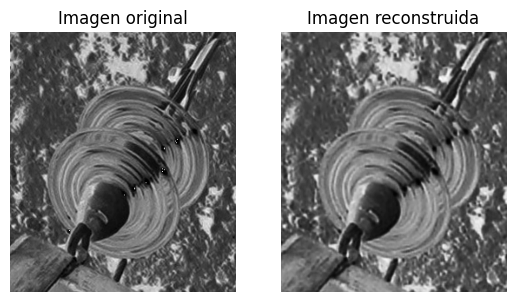

In [17]:
#Representacion de la imágen reconstruida
import matplotlib.pyplot as plt
import numpy
print("[INFO] making predictions...")
decoded = loaded_model.predict(testX_normal)
outputs = None

# loop over our number of output samples
#for i in range(0, len(testX_anomalies)):
	# grab the original image and reconstructed image
original = (testX_normal[2] * 255).astype("uint8")
recon = (decoded[2] * 255).astype("uint8")


plt.figure()
plt.subplot(1,2,1)
plt.imshow(numpy.squeeze(original, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(numpy.squeeze(recon, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen reconstruida')

[INFO] making predictions...
10/10 [==============================] - 4s 435ms/step


Text(0.5, 1.0, 'Imagen reconstruida')

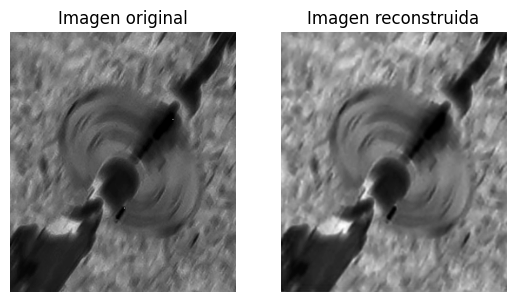

In [24]:
#Representacion de la imágen ANÓMALA
import matplotlib.pyplot as plt
import numpy
print("[INFO] making predictions...")
decoded = loaded_model.predict(testX_anomalies)
outputs = None

# loop over our number of output samples
#for i in range(0, len(testX_anomalies)):
	# grab the original image and reconstructed image
original = (testX_anomalies[4] * 255).astype("uint8")
recon = (decoded[4] * 255).astype("uint8")


plt.figure()
plt.subplot(1,2,1)
plt.imshow(numpy.squeeze(original, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(numpy.squeeze(recon, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen reconstruida')

In [23]:
#ERROR DE RECONSTRUCCIÓN

In [63]:
rec_normal = loaded_model(testX_normal).numpy()
rec_anormal = loaded_model(testX_anomalies).numpy()

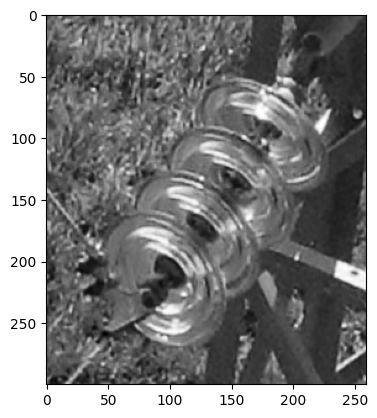

In [27]:
plt.imshow(rec_normal[34],cmap='gray')
plt.show()

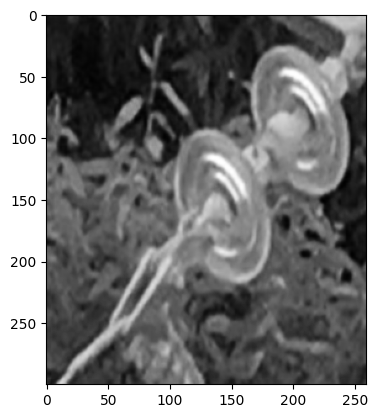

In [28]:
plt.imshow(rec_anormal[34],cmap='gray')
plt.show()

In [66]:
rec_anormal= cv2.resize(rec_anormal[11], dsize=(260,300),interpolation=cv2.INTER_CUBIC)
rec_normal=cv2.resize(rec_normal[11], dsize=(260,300),interpolation=cv2.INTER_CUBIC)
testX_normal=cv2.resize(testX_normal[11], dsize=(260,300),interpolation=cv2.INTER_CUBIC)
testX_anomalies=cv2.resize(testX_anomalies[11], dsize=(260,300),interpolation=cv2.INTER_CUBIC)

In [67]:
type(testX_normal)
type(testX_anomalies)
np.shape(testX_anomalies)

(300, 260)

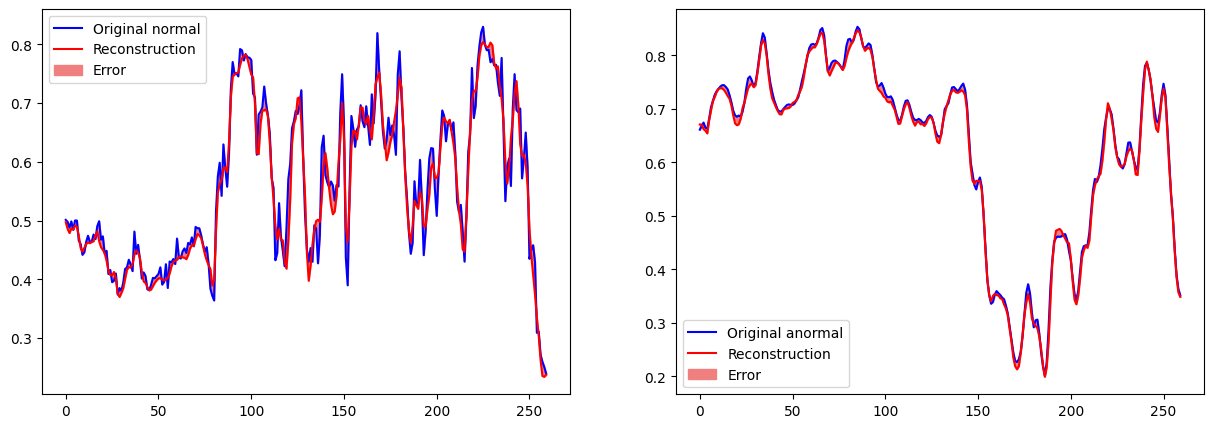

In [68]:
dato = 11
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(testX_normal[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(260), rec_normal[dato], testX_normal[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])
plt.subplot(1,2,2)
plt.plot(testX_anomalies[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(260), rec_anormal[dato], testX_anomalies[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

In [69]:
loss_normal= tf.keras.losses.mse(rec_normal, testX_normal).numpy()
loss_anormal= tf.keras.losses.mse(rec_anormal, testX_anomalies).numpy()

In [70]:
for i in range(3):
    print(loss_normal[i])

0.0014786050039672701
0.000971760702921016
0.0011557851619013392


In [71]:
for i in range(3):
    print(loss_anormal[i])

0.00038478186005204364
0.00020365893655306368
0.00021609218955443351


In [37]:
loss_normal=loss_normal.reshape(-1)
loss_anormal=loss_anormal.reshape(-1)

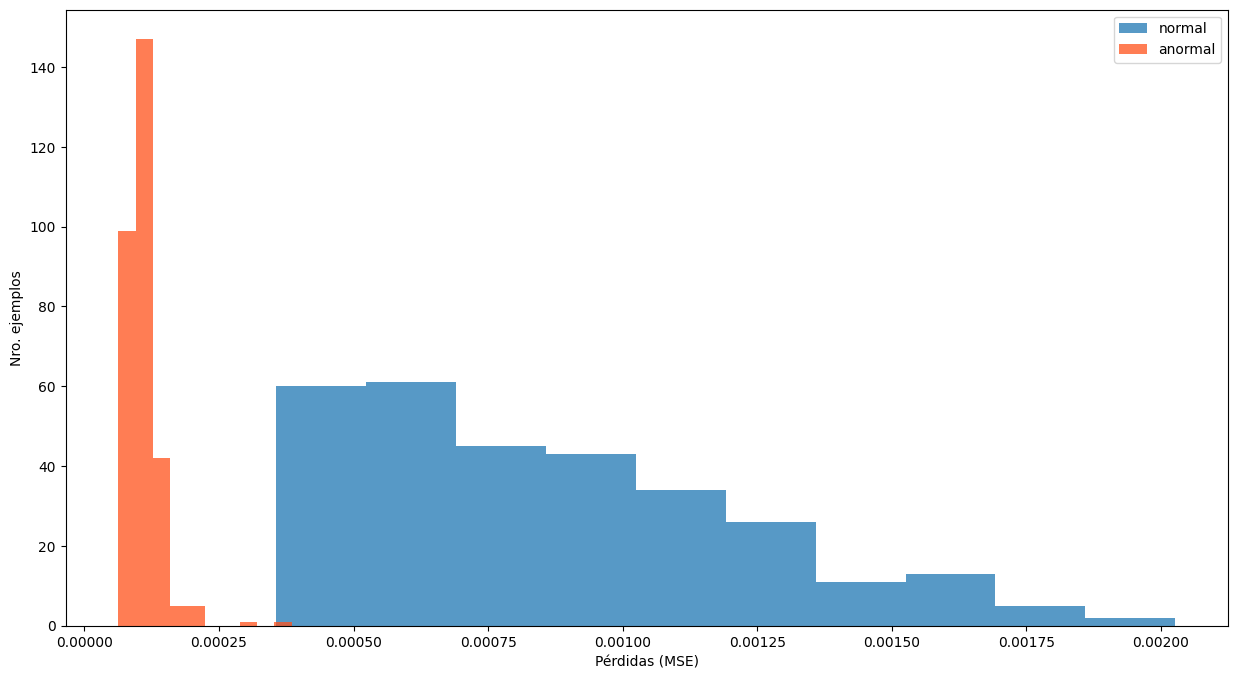

In [38]:
plt.figure(figsize=(15,8))
plt.hist(loss_normal, alpha=0.75, label='normal')
plt.hist(loss_anormal, alpha=0.75, color='#ff521b', label='anormal')

plt.xlabel('Pérdidas (MSE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')


In [39]:
umbral = np.mean(loss_normal) + np.std(loss_normal)
print("Umbral: ", umbral)

Umbral:  0.001221243033609925


In [110]:
def predecir(modelo, datos, umbral):
    reconstrucciones = modelo(datos)
    perdida = tf.keras.losses.mae(reconstrucciones, datos)
    return tf.math.less(perdida, umbral)

In [100]:
trainX_anomalies = np.expand_dims(trainX_anomalies, axis=1)
testX_anomalies = np.expand_dims(testX_anomalies, axis=1)

In [112]:
predecir(loaded_model, testX_anomalies[32], umbral)

<tf.Tensor: shape=(1, 300, 260), dtype=bool, numpy=
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [False,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])>